In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# load dataset
data=pd.read_csv("../data/covid_data.csv")
data.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [3]:
# check columns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [4]:
# remove unwanted columns
data.drop(columns=['URL', 'Study Documents',
                   'Results First Posted',
                   'Other IDs',
                   'Study Designs',
                   'Funded Bys',
                   'Outcome Measures',
                   'Acronym'
                   ], inplace=True)

In [5]:
data.columns.tolist()

['Rank',
 'NCT Number',
 'Title',
 'Status',
 'Study Results',
 'Conditions',
 'Interventions',
 'Sponsor/Collaborators',
 'Gender',
 'Age',
 'Phases',
 'Enrollment',
 'Study Type',
 'Start Date',
 'Primary Completion Date',
 'Completion Date',
 'First Posted',
 'Last Update Posted',
 'Locations']

In [6]:
# rename columns names
data.rename(columns={
    'Rank':'rank',
    'NCT Number':'nct_number',
    'Title':'title',
    'Status':'status',
    'Study Results':'study_results',
    'Conditions':'conditions',
    'Interventions':'interventions',
    'Sponsor/Collaborators':'sponsor_collaborators',
    'Gender':'gender',
    'Age':'age',
    'Phases':'phases',
    'Enrollment':'enrollment',
    'Study Type':'study_type',
    'Start Date':'start_date',
    'Primary Completion Date':'primary_completion_date',
    'Completion Date': 'completion_date',
    'First Posted': 'first_posted',
    'Last Update Posted': 'last_update_posted',
    'Locations': 'locations'
}, inplace=True)

In [7]:
data.columns

Index(['rank', 'nct_number', 'title', 'status', 'study_results', 'conditions',
       'interventions', 'sponsor_collaborators', 'gender', 'age', 'phases',
       'enrollment', 'study_type', 'start_date', 'primary_completion_date',
       'completion_date', 'first_posted', 'last_update_posted', 'locations'],
      dtype='object')

In [8]:
# check nullvalues
data.isnull().sum()

rank                          0
nct_number                    0
title                         0
status                        0
study_results                 0
conditions                    0
interventions               886
sponsor_collaborators         0
gender                       10
age                           0
phases                     2461
enrollment                   34
study_type                    0
start_date                   34
primary_completion_date      36
completion_date              36
first_posted                  0
last_update_posted            0
locations                   585
dtype: int64

In [9]:
# fill null values
data.dtypes

rank                         int64
nct_number                  object
title                       object
status                      object
study_results               object
conditions                  object
interventions               object
sponsor_collaborators       object
gender                      object
age                         object
phases                      object
enrollment                 float64
study_type                  object
start_date                  object
primary_completion_date     object
completion_date             object
first_posted                object
last_update_posted          object
locations                   object
dtype: object

In [10]:
data.head()

,rank,nct_number,title,status,study_results,conditions,interventions,sponsor_collaborators,gender,age,phases,enrollment,study_type,start_date,primary_completion_date,completion_date,first_posted,last_update_posted,locations
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Groupe Hospitalier Paris Saint Joseph,All,"18 Years and older (Adult, Older Adult)",Not Applicable,1000.0,Interventional,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ..."
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,United Medical Specialties,All,"18 Years and older (Adult, Older Adult)",Phase 1|Phase 2,60.0,Interventional,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia"
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,University of Milano Bicocca,All,"18 Years and older (Adult, Older Adult)",NaN,500.0,Observational,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P..."
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Hong Kong Sanatorium & Hospital,All,"Child, Adult, Older Adult",NaN,2500.0,Observational,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho..."
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,18 Years to 48 Years (Adult),NaN,50.0,Observational,"May 5, 2020",May 2021,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France"


In [11]:
miss_values = {
    'interventions': 'Not Specified',
    'phases': 'Not Applicable',
    'enrollment': 0,
    'gender': 'Not Specified',
    'start_date': 0,
    'primary_completion_date': 0,
    'completion_date': 0,
    'locations': 'Not Specified'
    
}
data.fillna(miss_values, inplace=True)

In [12]:
data.isnull().sum().tolist()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [13]:
data.dtypes

rank                         int64
nct_number                  object
title                       object
status                      object
study_results               object
conditions                  object
interventions               object
sponsor_collaborators       object
gender                      object
age                         object
phases                      object
enrollment                 float64
study_type                  object
start_date                  object
primary_completion_date     object
completion_date             object
first_posted                object
last_update_posted          object
locations                   object
dtype: object

In [14]:
# change datatypes
data['enrollment'] = pd.to_numeric(data['enrollment'])

date_cols = ['start_date', 'primary_completion_date', 'completion_date', 'first_posted', 'last_update_posted']

for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')


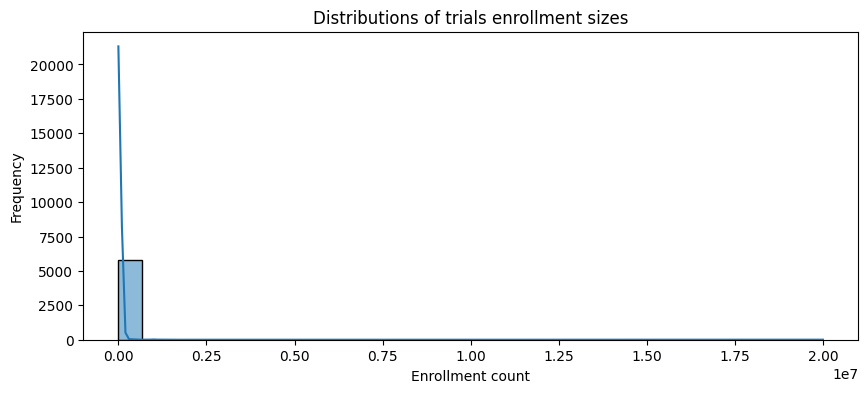

<Figure size 640x480 with 0 Axes>

In [15]:
# univariate
plt.figure(figsize=(10,4))
sns.histplot(x=data['enrollment'], kde=True, bins=30)
plt.title('Distributions of trials enrollment sizes')
plt.xlabel('Enrollment count')
plt.ylabel('Frequency')
plt.show()
plt.savefig('../images/trial_enrollment_size', dpi=400)

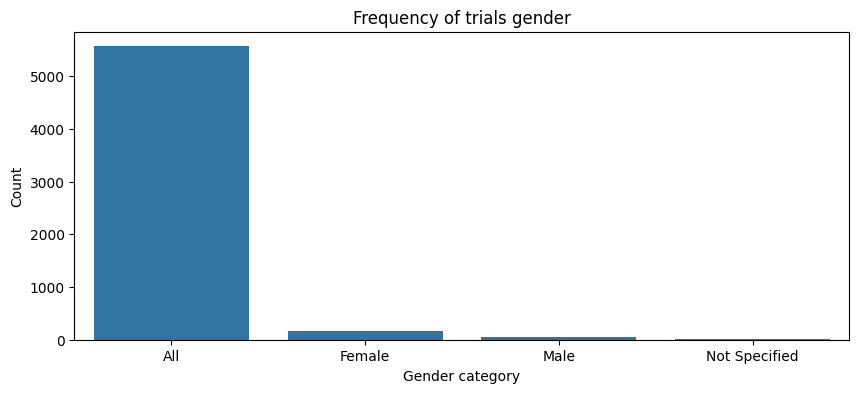

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10,4))
sns.countplot(x=data['gender'], order=data['gender'].value_counts().index)
plt.title('Frequency of trials gender')
plt.xlabel('Gender category')
plt.ylabel('Count')
plt.show()
plt.savefig('../images/trial_freq_gender', dpi=400)

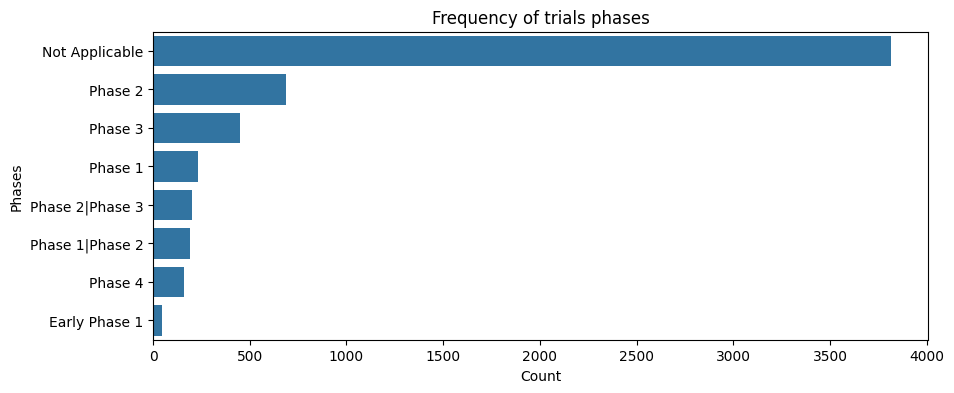

In [17]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data, y='phases', order=data['phases'].value_counts().index)
plt.title('Frequency of trials phases')
plt.xlabel('Count')
plt.ylabel('Phases')
plt.show()

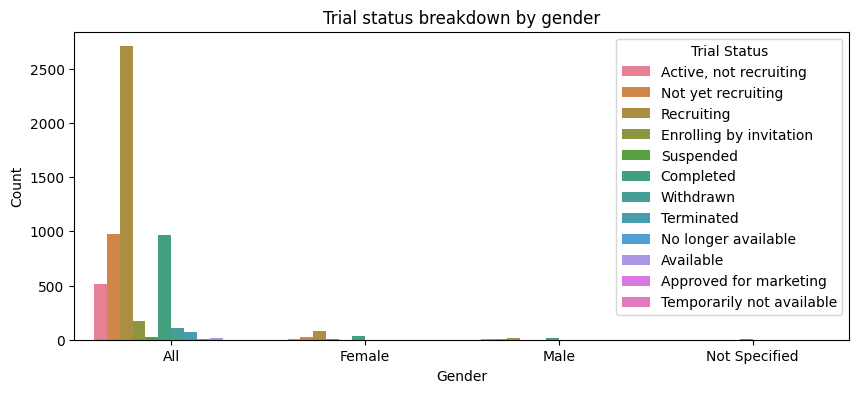

In [18]:
# bivariate analysis
plt.figure(figsize=(10, 4))
sns.countplot(x='gender', hue='status', data=data)
plt.title('Trial status breakdown by gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Trial Status')
plt.show()

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_4108\1640053379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, y='status', x='enrollment', estimator=sum, palette='Spectral')


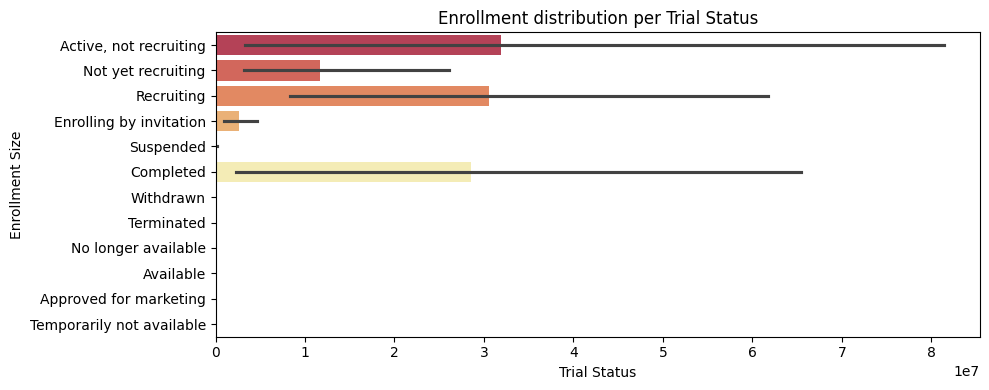

In [19]:
plt.figure(figsize=(10, 4))
sns.barplot(data=data, y='status', x='enrollment', estimator=sum, palette='Spectral')
plt.title('Enrollment distribution per Trial Status')
plt.xlabel('Trial Status')
plt.ylabel('Enrollment Size')
plt.tight_layout()
plt.show()

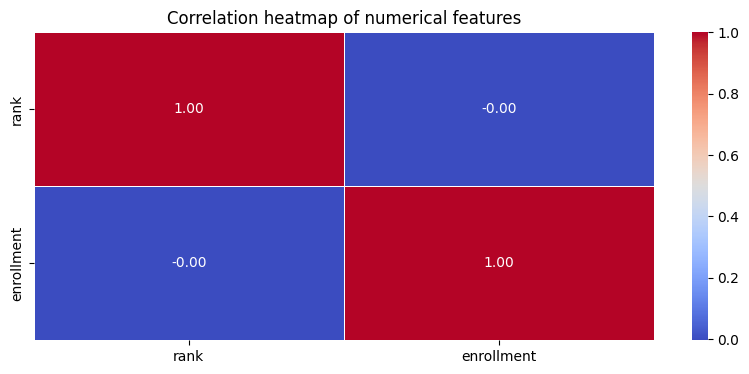

In [20]:
numerical_cols = ['rank', 'enrollment']
plt.figure(figsize=(10,4))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5 )
plt.title('Correlation heatmap of numerical features')
plt.show()

#### Model prediction

In [21]:
data['is_completed'] = (data['status'] == 'Completed').astype(int)

In [22]:
X = data[['gender', 'phases', 'enrollment', 'study_type']]
y = data['is_completed']

In [23]:
X = pd.get_dummies(X, columns=['gender', 'phases', 'study_type'], drop_first=True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
model = LogisticRegression(max_iter=1000)
print("Training the model...")
model.fit(X_train, y_train)
print("Training completed")

Training the model...
Training completed


In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nmodel's accuracy is: {accuracy * 100:.2f}%")


model's accuracy is: 81.10%
